In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
from shutil import copyfile
from skimage import exposure
from itertools import product

# Загрузка и сводка по файлу

In [2]:
filename = 'data_3.sgy'

In [3]:
def print_info(segyfile):
    with segyio.open(segyfile, mode = 'r', iline=189, xline=193, strict=True, ignore_geometry=False) as segy:
        width = len(segy.ilines)
        length = len(segy.xlines)
        depth = len(segy.samples)
        dtype = segy.format
        print(f'Width: {width}\nLength: {length}\nDepth: {depth}\nNumber format: {dtype}')

In [4]:
print_info(filename)

Width: 201
Length: 201
Depth: 51
Number format: 4-byte IEEE float


In [5]:
def find_value_range(segyfile):
    with segyio.open(segyfile, mode = 'r', iline=189, xline=193, strict=True, ignore_geometry=False) as segy:
        gmin, gmax = float('inf'), -1*float('inf')
        for f in segy.fast:
            min = np.min(f)
            if min < gmin:
                gmin = min
            max = np.max(f)
            if max > gmax:
                gmax = max
        return gmin, gmax

In [6]:
def normalized_array(segyfile, bins):
    min_val, max_val = find_value_range(segyfile)
    segy = segyio.tools.cube(segyfile)
    width, length, depth = segy.shape
    output_array = np.zeros(segy.shape, dtype=np.dtype(int))   
    bin_width = (max_val - min_val) / (bins-1)
    for x, y, z in product(range(width), range(length), range(depth)):
        v = segy[x ,y ,z]
        v_norm = int((v - min_val) / bin_width)
        output_array[x,y,z]=v_norm
    return output_array

In [7]:
def plot_histogram(array):
    values, counts = np.unique(array, return_counts=True)
    plt.figure(figsize=(10,5))
    plt.bar(values, counts)
    plt.show()

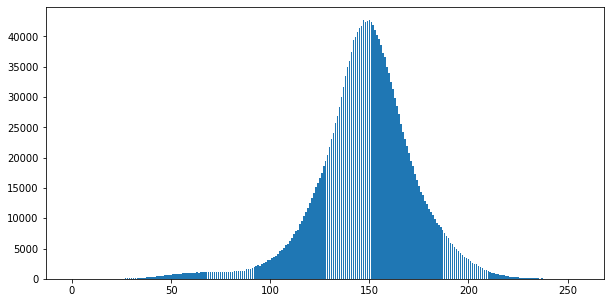

In [8]:
volume = normalized_array(filename, 256)
plot_histogram(volume)

# Визуализация

In [9]:
data = segyio.tools.cube(filename)

In [31]:
def display_cube(cube):
    fig = plt.figure(figsize=(15,10))

    ax = fig.add_subplot(131)
    sim = ax.imshow(cube[:,:,50], cmap='gray_r');
    fig.colorbar(sim, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_xaxis()

    ax1 = fig.add_subplot(132)
    amp = ax1.imshow(cube[:,200,:], cmap='gray_r');
    fig.colorbar(amp, ax=ax1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.invert_xaxis()

    ax2 = fig.add_subplot(133)
    amp = ax2.imshow(cube[200,:,:], cmap='gray_r');
    fig.colorbar(amp, ax=ax2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.invert_xaxis()

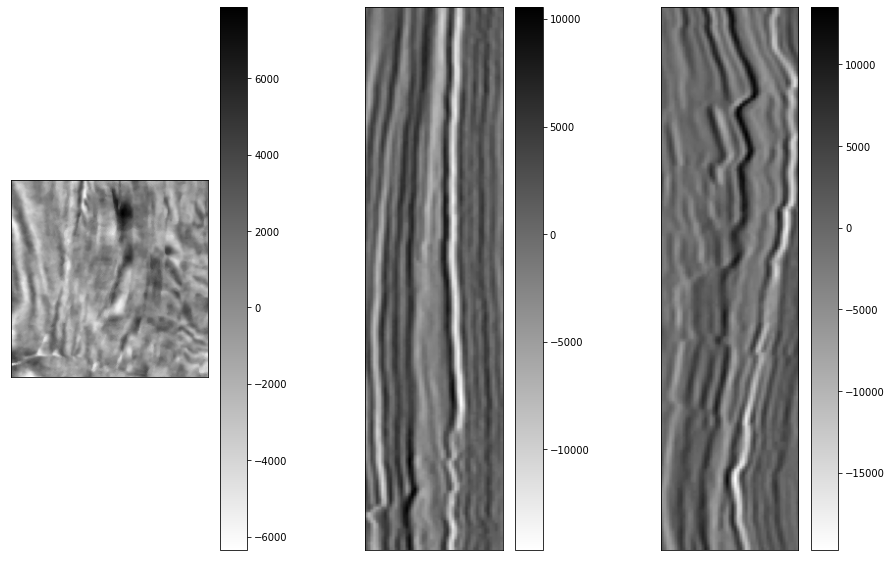

In [32]:
display_cube(data)